In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
import pickle

In [33]:
df = pd.read_csv('/workspaces/Antonio27M-machine-learning/data/raw/internal-link-medic.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Predecir el coste del seguro médico de una persona

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de los datos fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

- age. Edad del beneficiario principal (numérico)
- sex. Género del beneficiario principal (categórico)
- bmi. índice de masa corporal (numérico)
- children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
- smoker. ¿Es fumador? (categórico)
- region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
- charges. Prima del seguro médico (numérico) TARGET

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Factorize. 

In [36]:
df_factorize = df.copy()

In [37]:
df_factorize['number_region'] = pd.factorize(df['region'])[0]
df_factorize['number_smoker'] = pd.factorize(df['smoker'])[0]
df_factorize['number_sex'] = pd.factorize(df['sex'])[0]
df_numerico = df_factorize.select_dtypes(include=['number'])

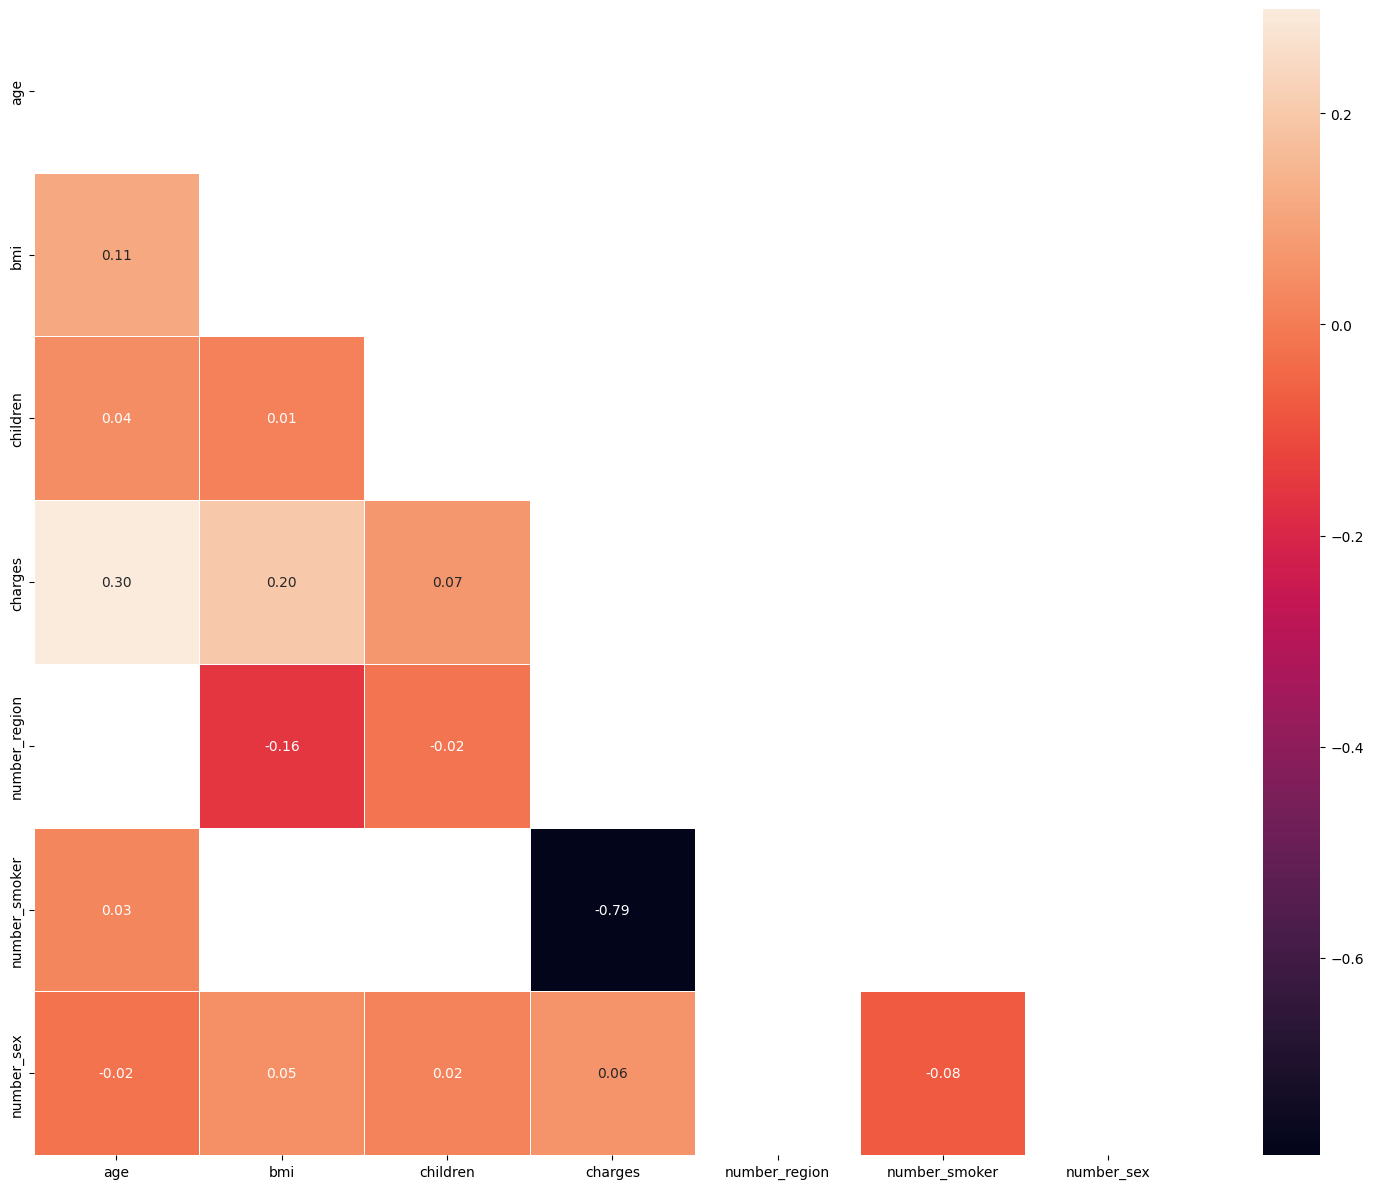

In [38]:
corr = df_numerico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.01]
significant_corr
fig, axis = plt.subplots(figsize=(15, 12))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

### Observaciones: 

Ninguna variable está correlacionada entre sí, tomando en consideración mis target' charges'.

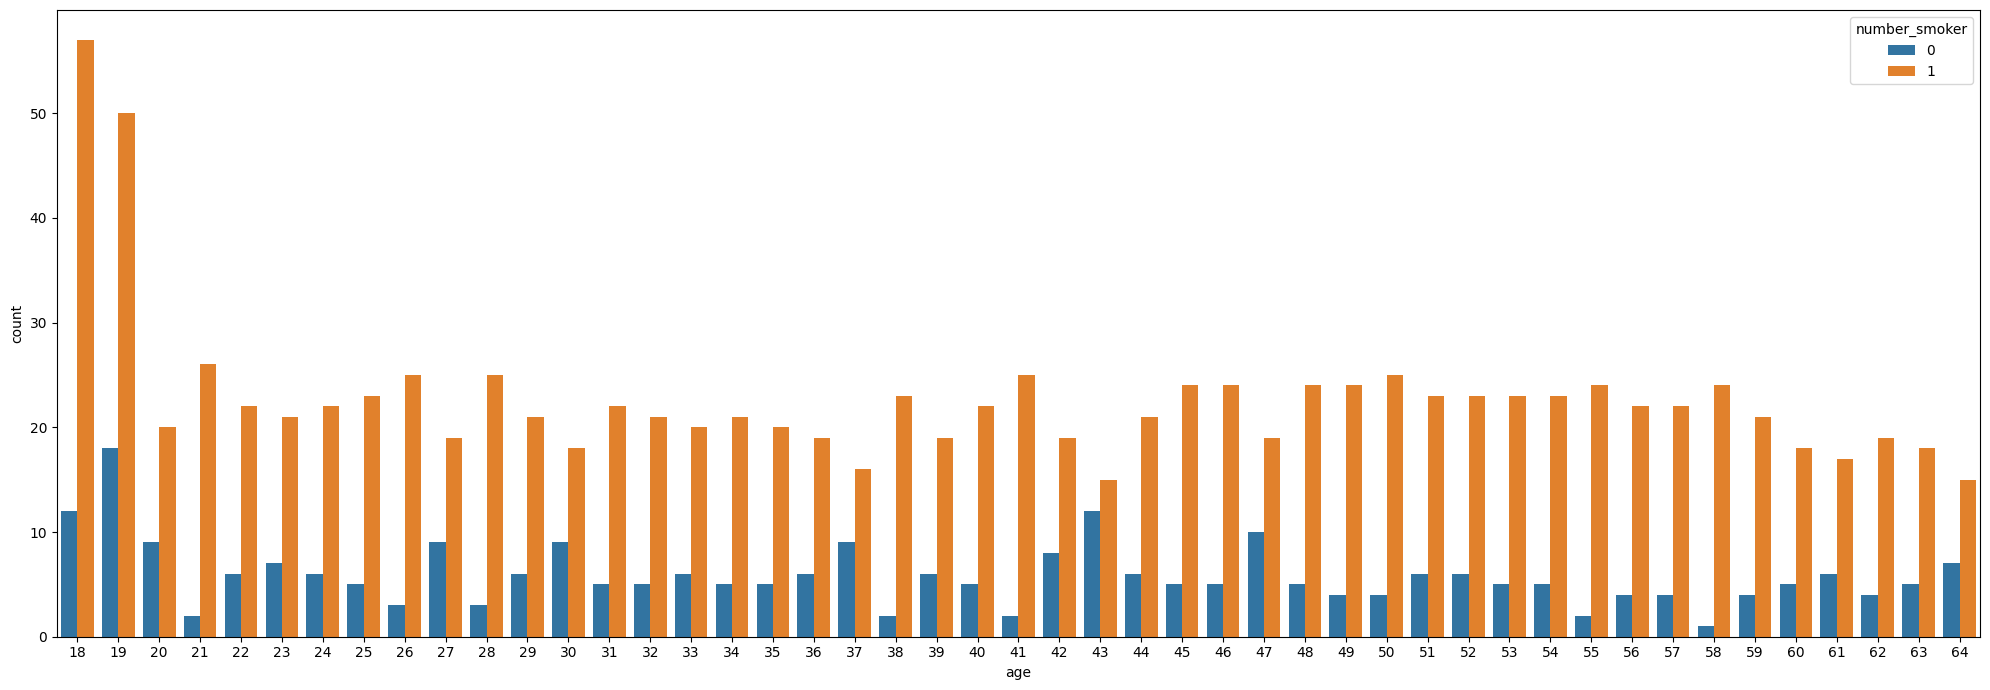

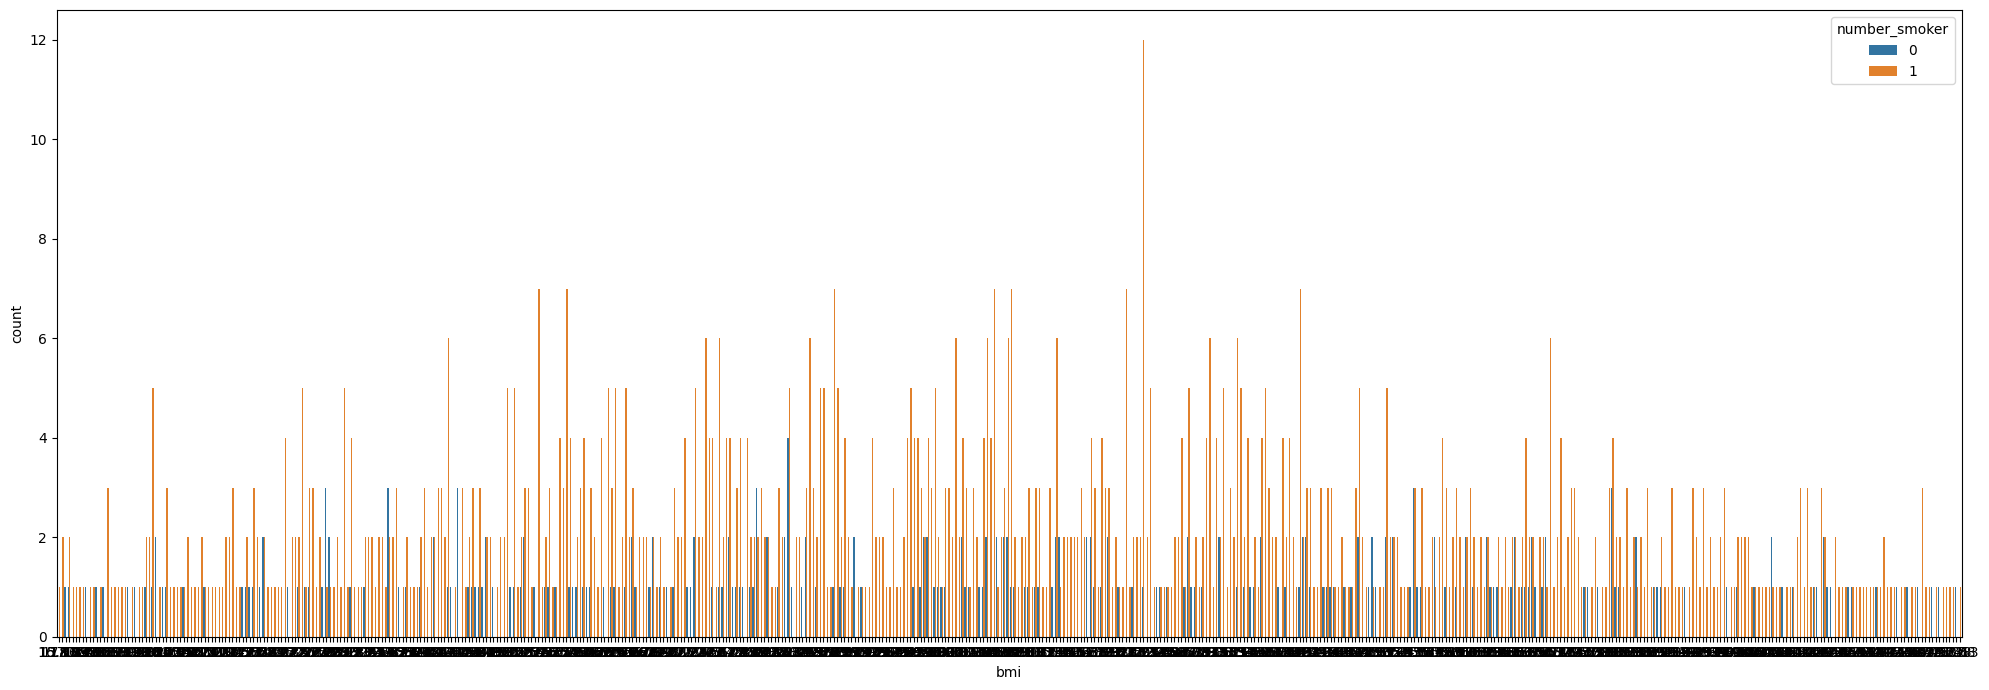

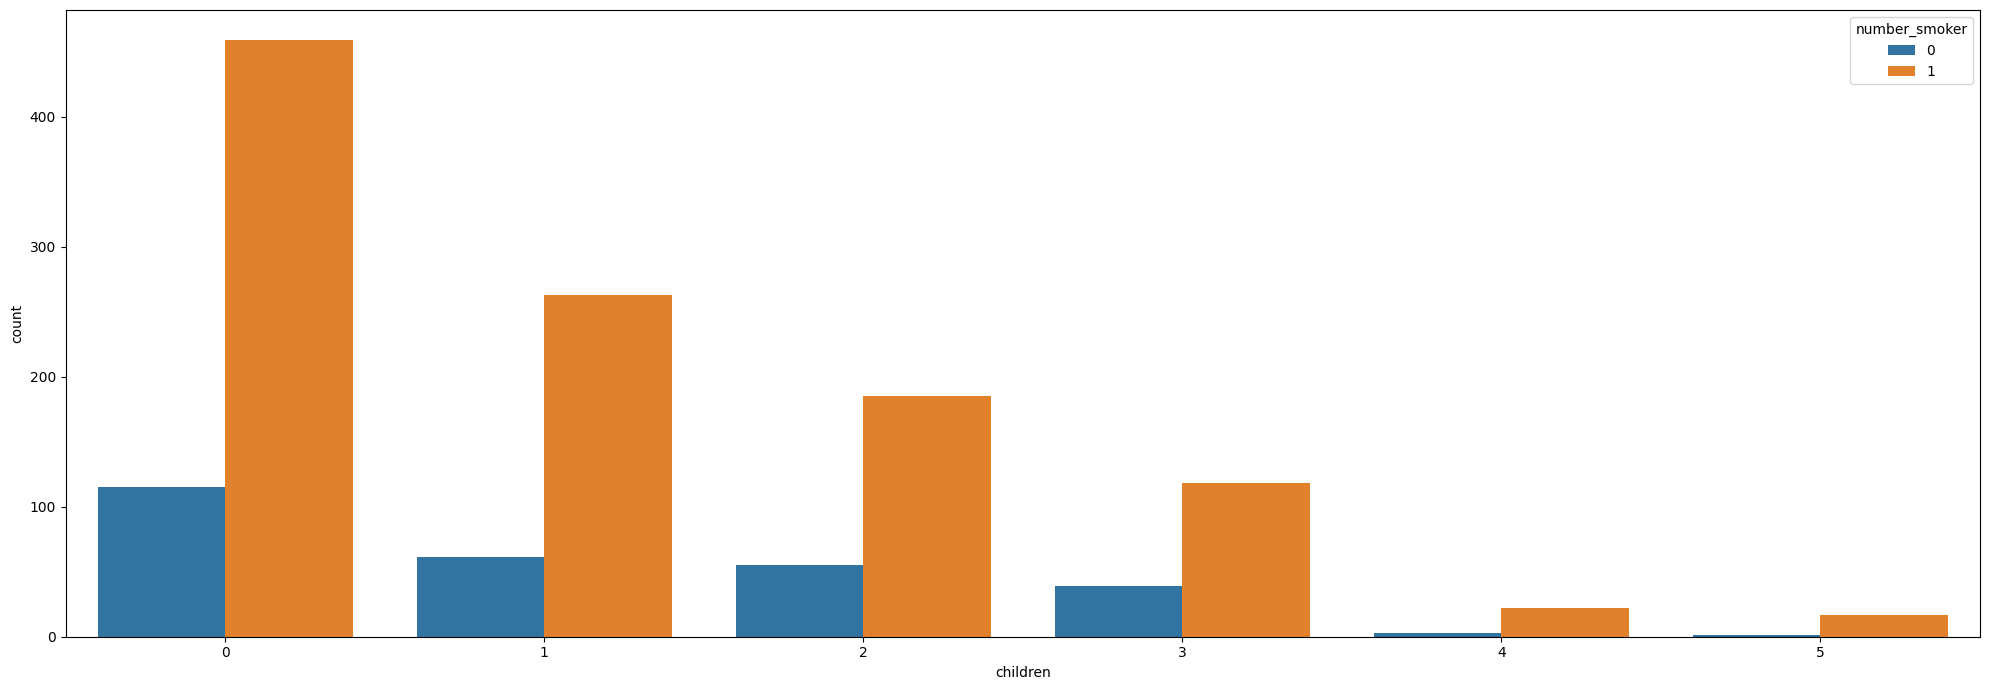

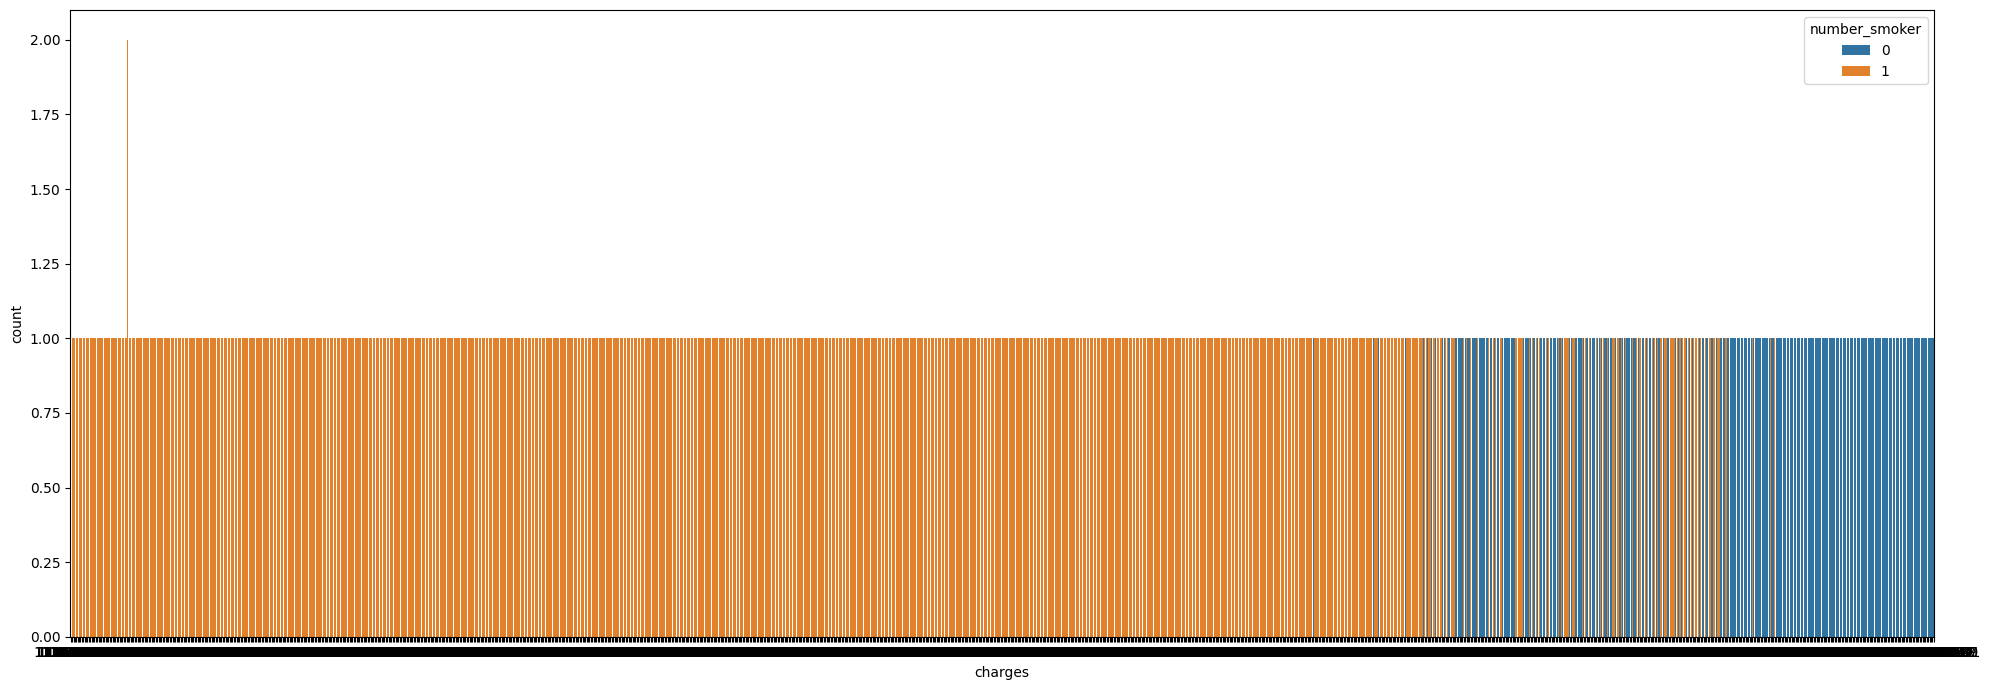

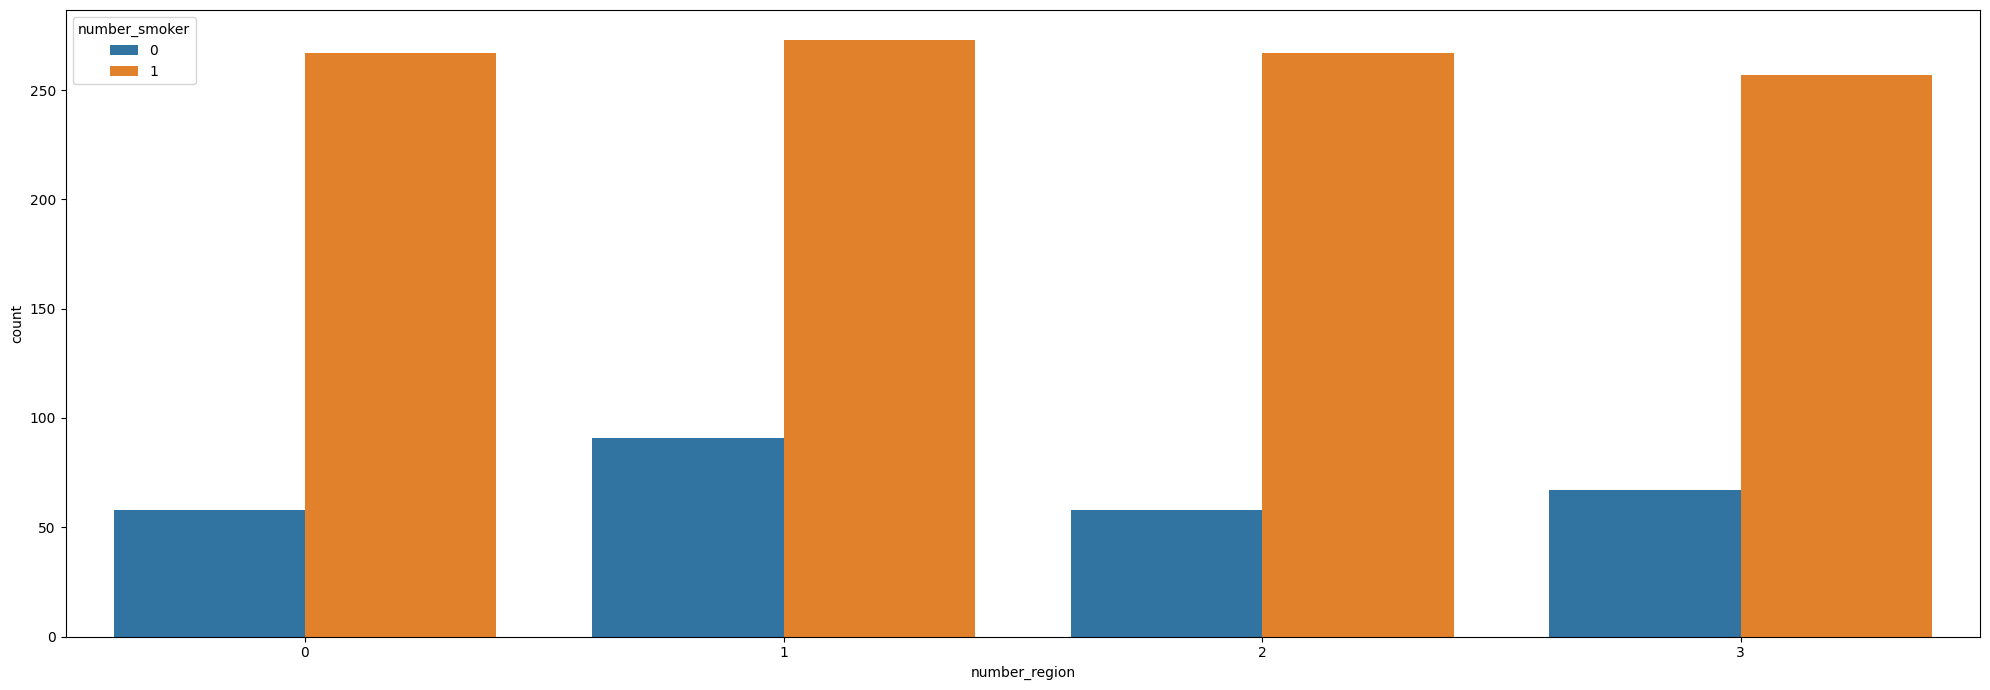

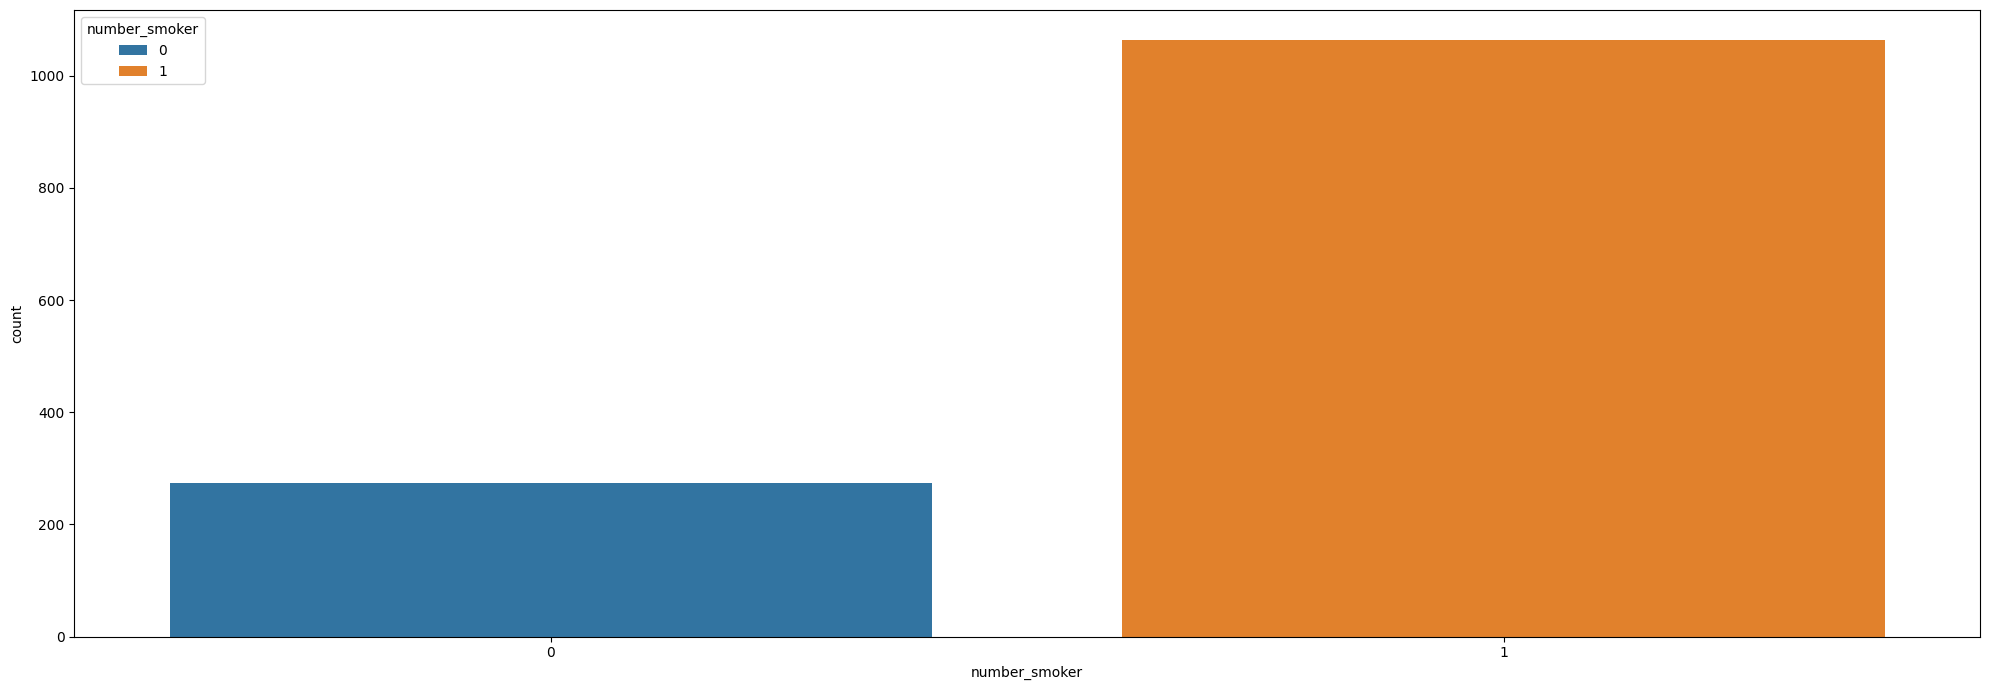

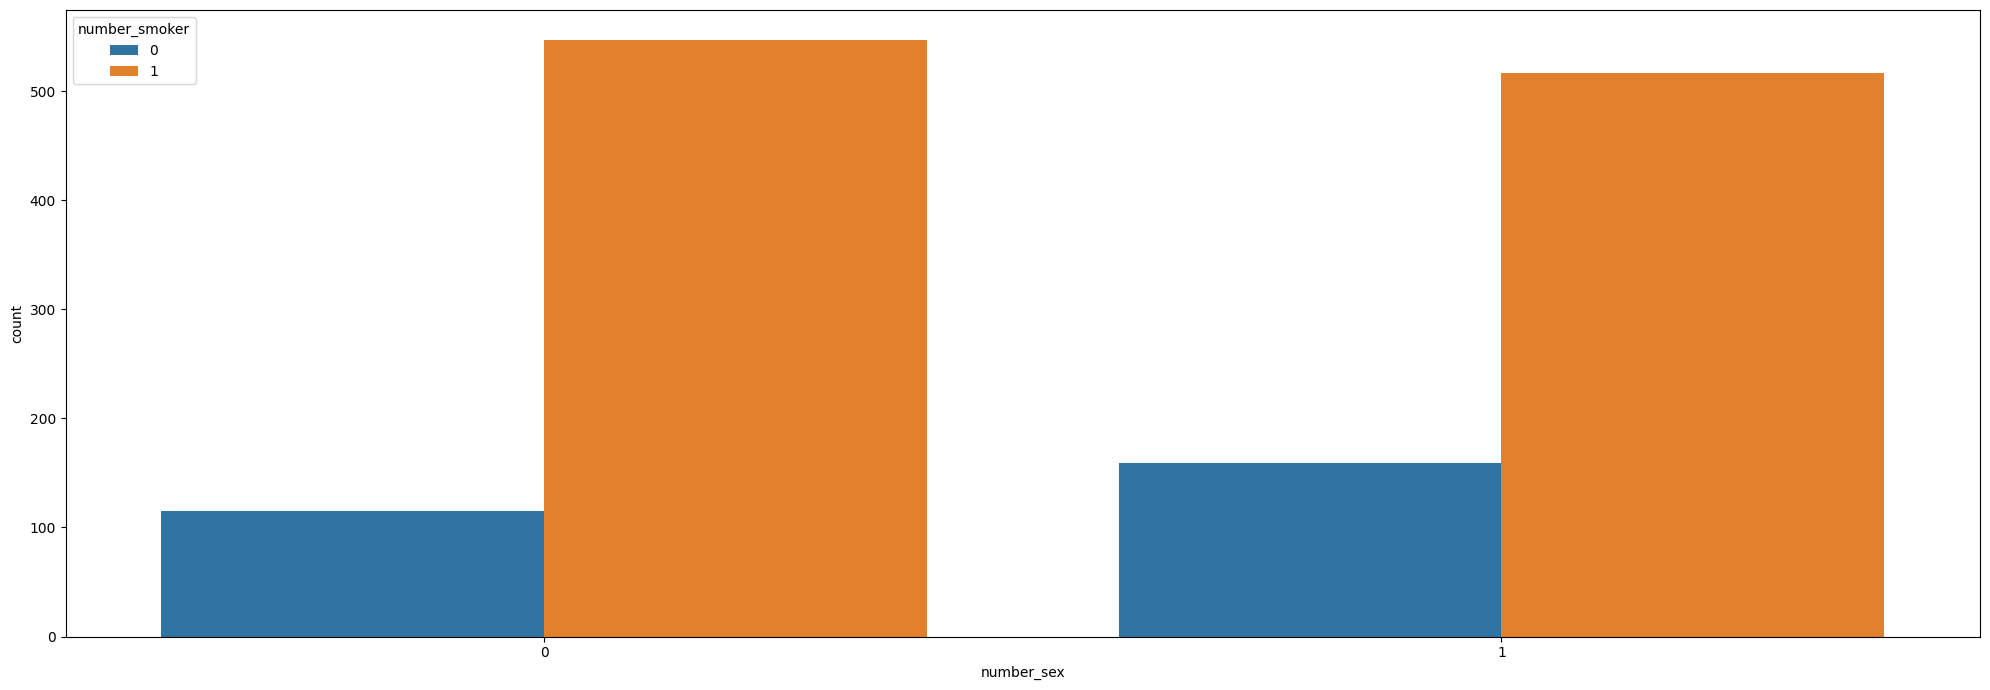

In [39]:
for columnas in df_numerico:
    fig, axis = plt.subplots(figsize=(20, 7))
    sns.countplot(data=df_numerico, x=columnas, hue='number_smoker')
    plt.tight_layout()
    plt.show()

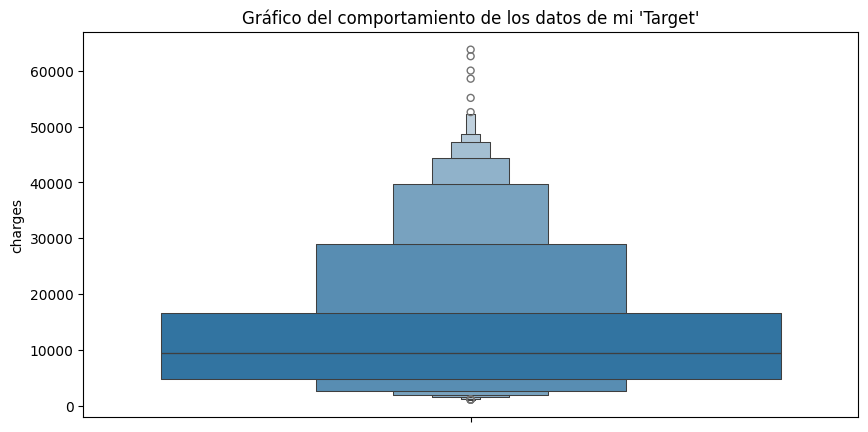

In [40]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df['charges'])
plt.title("Gráfico del comportamiento de los datos de mi 'Target'")
plt.show()

### Slipt. 

In [41]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [42]:
X_train

,age,sex,bmi,children,smoker,region
1153,35,female,35.815,1,no,northwest
1100,33,female,19.095,2,yes,northeast
661,57,female,23.980,1,no,southeast
147,51,female,37.730,1,no,southeast
534,64,male,40.480,0,no,southeast
...,...,...,...,...,...,...
1198,40,male,29.355,1,no,northwest
837,56,female,28.310,0,no,northeast
1144,50,male,32.300,2,no,southwest
275,47,female,26.600,2,no,northeast


In [43]:
X_test

,age,sex,bmi,children,smoker,region
381,55,male,30.685,0,yes,northeast
38,35,male,36.670,1,yes,northeast
197,45,female,28.600,2,no,southeast
14,27,male,42.130,0,yes,southeast
94,64,female,31.300,2,yes,southwest
...,...,...,...,...,...,...
977,26,male,29.150,1,no,southeast
1108,26,male,30.000,1,no,southwest
8,37,male,29.830,2,no,northeast
808,18,male,30.140,0,no,southeast


### Encoding.

In [44]:
cat_variables = ['sex','smoker', 'region']
onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_encoder.fit(X_train[cat_variables])

X_train_cat_ohe = onehot_encoder.fit_transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index=X_train.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index=X_test.index, columns=onehot_encoder.get_feature_names_out(cat_variables))


In [45]:
X_test_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 381 to 816
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex_female        268 non-null    float64
 1   sex_male          268 non-null    float64
 2   smoker_no         268 non-null    float64
 3   smoker_yes        268 non-null    float64
 4   region_northeast  268 non-null    float64
 5   region_northwest  268 non-null    float64
 6   region_southeast  268 non-null    float64
 7   region_southwest  268 non-null    float64
dtypes: float64(8)
memory usage: 18.8 KB


In [46]:
min_max_scaler = MinMaxScaler() 

num_variables = ['age','bmi','children']
min_max_features = min_max_scaler.fit_transform(X_train[num_variables])

df_min_max = pd.DataFrame(min_max_features, index=X_train.index, columns=num_variables)

In [47]:
df_min_max.head()

,age,bmi,children
1153,0.369565,0.523200,0.2
1100,0.326087,0.062784,0.4
661,0.847826,0.197301,0.2
147,0.717391,0.575933,0.2
534,1.000000,0.651659,0.0


In [48]:
df_min_max

,age,bmi,children
1153,0.369565,0.523200,0.2
1100,0.326087,0.062784,0.4
661,0.847826,0.197301,0.2
147,0.717391,0.575933,0.2
534,1.000000,0.651659,0.0
...,...,...,...
1198,0.478261,0.345312,0.2
837,0.826087,0.316536,0.0
1144,0.695652,0.426408,0.4
275,0.630435,0.269448,0.4


In [49]:
X_test_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 381 to 816
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex_female        268 non-null    float64
 1   sex_male          268 non-null    float64
 2   smoker_no         268 non-null    float64
 3   smoker_yes        268 non-null    float64
 4   region_northeast  268 non-null    float64
 5   region_northwest  268 non-null    float64
 6   region_southeast  268 non-null    float64
 7   region_southwest  268 non-null    float64
dtypes: float64(8)
memory usage: 18.8 KB


In [50]:
columns_drop = ['sex_male', 'smoker_no']

X_train_cat_ohe.drop(columns=columns_drop, inplace=True)
X_test_cat_ohe.drop(columns=columns_drop, inplace=True)
X_train_seg = pd.concat([X_train.drop(columns=cat_variables), X_train_cat_ohe], axis=1)
X_test_seg = pd.concat([X_test.drop(columns=cat_variables), X_test_cat_ohe], axis=1)

In [51]:
X_test_seg

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
381,55,30.685,0,0.0,1.0,1.0,0.0,0.0,0.0
38,35,36.670,1,0.0,1.0,1.0,0.0,0.0,0.0
197,45,28.600,2,1.0,0.0,0.0,0.0,1.0,0.0
14,27,42.130,0,0.0,1.0,0.0,0.0,1.0,0.0
94,64,31.300,2,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
977,26,29.150,1,0.0,0.0,0.0,0.0,1.0,0.0
1108,26,30.000,1,0.0,0.0,0.0,0.0,0.0,1.0
8,37,29.830,2,0.0,0.0,1.0,0.0,0.0,0.0
808,18,30.140,0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
X_test

,age,sex,bmi,children,smoker,region
381,55,male,30.685,0,yes,northeast
38,35,male,36.670,1,yes,northeast
197,45,female,28.600,2,no,southeast
14,27,male,42.130,0,yes,southeast
94,64,female,31.300,2,yes,southwest
...,...,...,...,...,...,...
977,26,male,29.150,1,no,southeast
1108,26,male,30.000,1,no,southwest
8,37,male,29.830,2,no,northeast
808,18,male,30.140,0,no,southeast


In [53]:
X_train_final = pd.concat([X_train_seg.drop(columns=num_variables), df_min_max], axis=1)
X_test_final = X_test_seg[X_train_final.columns]

In [54]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 1153 to 1322
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex_female        1070 non-null   float64
 1   smoker_yes        1070 non-null   float64
 2   region_northeast  1070 non-null   float64
 3   region_northwest  1070 non-null   float64
 4   region_southeast  1070 non-null   float64
 5   region_southwest  1070 non-null   float64
 6   age               1070 non-null   float64
 7   bmi               1070 non-null   float64
 8   children          1070 non-null   float64
dtypes: float64(9)
memory usage: 83.6 KB


In [55]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 381 to 816
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex_female        268 non-null    float64
 1   smoker_yes        268 non-null    float64
 2   region_northeast  268 non-null    float64
 3   region_northwest  268 non-null    float64
 4   region_southeast  268 non-null    float64
 5   region_southwest  268 non-null    float64
 6   age               268 non-null    int64  
 7   bmi               268 non-null    float64
 8   children          268 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 20.9 KB


In [56]:
with open('/workspaces/Antonio27M-machine-learning/models/linear_regression-onehot-encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)

In [64]:
X_test_final

,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
381,0.0,1.0,1.0,0.0,0.0,0.0,55,30.685,0
38,0.0,1.0,1.0,0.0,0.0,0.0,35,36.670,1
197,1.0,0.0,0.0,0.0,1.0,0.0,45,28.600,2
14,0.0,1.0,0.0,0.0,1.0,0.0,27,42.130,0
94,1.0,1.0,0.0,0.0,0.0,1.0,64,31.300,2
...,...,...,...,...,...,...,...,...,...
977,0.0,0.0,0.0,0.0,1.0,0.0,26,29.150,1
1108,0.0,0.0,0.0,0.0,0.0,1.0,26,30.000,1
8,0.0,0.0,1.0,0.0,0.0,0.0,37,29.830,2
808,0.0,0.0,0.0,0.0,1.0,0.0,18,30.140,0


### Modelado. 

In [58]:
model = LinearRegression()
model.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
intercept = model.intercept_
coefficient =  model.coef_[0]

intercept, coefficient

(np.float64(-1814.0381209024326), np.float64(-122.55713748691939))

In [60]:
model.score(X_train_final, y_train)

0.7460682941281696

In [61]:
y_pred = model.predict(X_test_final)
y_pred

array([1016905.21077597,  844402.86786249,  854355.37163222,
        804359.92070901, 1135875.57278606,  614690.76015034,
        775315.04578435,  986982.28428297,  969260.53619906,
        722808.48192425,  487460.96246832,  816366.31690867,
       1048891.54743964,  535998.64550142, 1061172.32331171,
        960322.8599404 ,  991189.80301168,  499021.69910096,
        770092.68408729,  626710.54218338,  987781.22917728,
        854937.65975729,  587433.89346512,  639813.57165327,
        466469.09698483,  580088.04471901,  608472.74141526,
        643024.87268381,  638886.78133427,  547251.83967479,
        715555.96287676,  448322.329335  ,  629350.59143492,
        578430.92432915,  617082.50711534,  540184.67655591,
       1168191.48931428,  967373.89934415,  762389.50811536,
        583687.38045708,  630242.97679501,  919391.31746817,
        634226.57979391,  897000.92008355,  784073.05519275,
        636059.67259684, 1029625.4231326 ,  924936.80801957,
        860388.61522186,

In [62]:
len(y_test), len(y_pred)

(268, 268)

In [63]:
metrics = {'MSE': mean_squared_error(y_test, y_pred),'RMSE': root_mean_squared_error(y_test, y_pred),'MAPE': mean_absolute_percentage_error(y_test, y_pred),'R^2': r2_score(y_test, y_pred), }

metrics

{'MSE': 626898816427.9319,
 'RMSE': 791769.4212508664,
 'MAPE': 122.08343055190353,
 'R^2': -3978.0926170371476}

### Observaciones:

>'RMSE' me dio mayor a 9, deduzco que le valor es incorrecto. 